# Analysing and Visualizing Data

#### Analysis and Visualization brief
We have cleaned our data and obtained two separate dataset, one contains general information about the tweet, `tweet_data_clean.csv` while the other contains information about the dog in the picture ``image_data_clean.csv``. With this two data set available to us, we will be generating insights that will give answer to some interesting question.

The most pertinent question is, **'What are the chracteristics of tweet status that attracts the most response in terms of retweets and likes.'**

To answer this question, we will answer some more question like
- What is the most liked tweets
- what is the most retweeted tweet
- The most common breed of dog
- The most liked breed of Dog 
- How the image resolution affect the response.
- The most popular dog growth stage
- sentiment Analysis on the Text, to know how the Tone of the Text influence response.


#### Data_Set Documentation
As stated earlier we have two dataset containing several fields for different observational units.
The ``tweet_data_clean.csv``  which has been loaded into the `df_tweet_data` DataFrame and the ``image_data_clean.csv`` which has been loaded into the df_image_data.

`df_tweet_data` DataFrame contains the following fields.

- **tweet_id (int64):** The tweet_id column contains a unique number that identifies each tweets.
- **timestamp (string):** Time stamp shows the date and time the tweet was posted. This column will converted t datetime object
- **source (string):** The source column shows the device from which the tweets was posted.
- **text (string):** The text column contains the tweet text posted alongside the picture of the dog. we will be performing a sentiment analysis on the text_column.
- **expanded_urls (text):** The expanded url column contains a link to the actual post on twitter platform.
- **rating_numerator(int64):** The rating numerator column contains the numerator value of the dog rating posted by the author of the post. The numerator is the top part of the fractional rating pattern employed on the `weratedog` twitter page.
- **rating_denominator(int64):** The rating denominator is the lower part of the ratings posted by the tweet's author. The rating deominator is usually '10' and mostly lower than the numerator.
- **retweet_count(int64):**: This is one of our target field. it contain one of the two audience engagement metrics.
- **favorite_count(int64):** This is the second target field. It shows how many audience like the tweet.
- **lang:** This column contains the language in which the tweet was posted. its mostly English but there are some other languages.


`df_image_data` DataFrame contains the following fields.
- **tweet_id(int64):** The tweet_id column column is the primary key field on which the two tables can be join
- **img_num(int64):** The img_num is contains the number of pictures provided per tweets.
- **name(string):** contains the name of the Dog as extracted from the Text column.
- **dog_growth_stage(string):** The growth stage the dog is in according to the information available in the  text column.
- **img_resolution_MP(float):** The picture resolution of the image in the twitter post.
- **jpg_url(string):** A link to downlaod the picture from the twitter website.
- **breed(string):** This contains the breed of the dog as extracted from the image prediction algorithms.

In [2]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
import seaborn as sns
import re

%matplotlib inline


In [3]:
# loading in the data
df_tweet_data = pd.read_csv('tweet_data_clean.csv')
df_image_data = pd.read_csv('image_data_clean.csv')

### Quick glance through

Taking a brief look at our dataset, we can observe the following issues,
- 1, The timestamp column is still a string, we will need to conert it to a datetime object.
- 2, The name column in the df_image_data column will adjusted  so that they the letters are all lower case.
- 3, Also the breed column will also be adjusted so that they are all in lower case


In [4]:
# an overview of the dataset
df_tweet_data.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,3478,22045,en
1,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,7224,36929,en
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,7757,35308,en
3,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,3619,24520,en
4,890006608113172480,2017-07-26 00:31:25+00:00,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,6151,27033,en


In [21]:
df_tweet_data.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.096000e+03,1096.000000,1096.0,1096.000000,1096.000000
mean,7.362894e+17,10.670620,10.0,2129.552007,7551.432482
std,6.720513e+16,2.029934,0.0,3454.215906,10530.418482
min,6.660293e+17,0.000000,10.0,11.000000,66.000000
25%,6.758663e+17,10.000000,10.0,480.250000,1659.000000
50%,7.095427e+17,11.000000,10.0,1094.500000,3526.000000
75%,7.866760e+17,12.000000,10.0,2530.250000,9310.750000
max,8.918152e+17,14.000000,10.0,51663.000000,111681.000000


In [22]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1096 non-null   int64 
 1   timestamp           1096 non-null   object
 2   source              1096 non-null   object
 3   text                1096 non-null   object
 4   expanded_urls       1096 non-null   object
 5   rating_numerator    1096 non-null   int64 
 6   rating_denominator  1096 non-null   int64 
 7   retweet_count       1096 non-null   int64 
 8   favorite_count      1096 non-null   int64 
 9   lang                1096 non-null   object
dtypes: int64(5), object(5)
memory usage: 85.8+ KB


In [23]:
df_image_data.head()

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed
0,891815181378084864,1,Archie,none,1.92,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
1,891689557279858688,1,Darla,none,1.92,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2,891327558926688256,2,Franklin,none,0.39,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
3,890609185150312448,1,Zoey,none,1.92,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier
4,890006608113172480,1,Koda,none,2.56,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed


In [24]:
df_image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1096 non-null   int64  
 1   img_num            1096 non-null   int64  
 2   name               1096 non-null   object 
 3   dog_growth_stage   1096 non-null   object 
 4   img_resolution_MP  1096 non-null   float64
 5   jpg_url            1096 non-null   object 
 6   breed              1096 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 60.1+ KB


In [25]:
df_image_data.describe()

,tweet_id,img_num,img_resolution_MP
count,1.096000e+03,1096.000000,1096.000000
mean,7.362894e+17,1.203467,1.060502
std,6.720513e+16,0.566675,0.903637
min,6.660293e+17,1.000000,0.010000
25%,6.758663e+17,1.000000,0.590000
50%,7.095427e+17,1.000000,0.790000
75%,7.866760e+17,1.000000,1.050000
max,8.918152e+17,4.000000,4.190000


###  A little more cleaning

- 1, The timestamp column is still a string, we will need to convert it to a datetime object.

#### Define
convert to a datatimeobject

#### code

In [26]:
df_tweet_data['timestamp'] = pd.to_datetime(df_tweet_data['timestamp'])

#### Test

In [27]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1096 non-null   int64              
 1   timestamp           1096 non-null   datetime64[ns, UTC]
 2   source              1096 non-null   object             
 3   text                1096 non-null   object             
 4   expanded_urls       1096 non-null   object             
 5   rating_numerator    1096 non-null   int64              
 6   rating_denominator  1096 non-null   int64              
 7   retweet_count       1096 non-null   int64              
 8   favorite_count      1096 non-null   int64              
 9   lang                1096 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 85.8+ KB


- 2, The ``name`` column in the df_image_data column will be adjusted  so that they the letters are all lower case.

#### Define
Convert text in name column to lower case

#### Code

In [28]:
df_image_data['name']=df_image_data['name'].apply(lambda x: x.lower())

#### Test

In [29]:
df_image_data['name']

0          archie
1           darla
2        franklin
3            zoey
4            koda
          ...    
1091        klint
1092      tickles
1093         kohl
1094    octaviath
1095         johm
Name: name, Length: 1096, dtype: object

- 3, Also the breed column will also be adjusted so that they are all in lower case

#### Define
convert the breed column to lower case

#### Code

In [30]:
df_image_data['breed']=df_image_data['breed'].apply(lambda x: x.lower())

#### Test

In [31]:
df_image_data['breed']

0                chihuahua
1       labrador_retriever
2                   basset
3            irish_terrier
4                  samoyed
               ...        
1091     yorkshire_terrier
1092                beagle
1093            toy_poodle
1094     italian_greyhound
1095    labrador_retriever
Name: breed, Length: 1096, dtype: object

## Exploratory analysis and Visualization.
The most pertinent question is, **'What are the chracteristics of tweet status that attracts the most response in terms of retweets and likes.'**

To answer this question, we will answer some more question like
- What is relationship between favorite_count and retweet_count.
- what is the most liked/retweeted tweet.
- How does time affect the value of retweet_count  and favorite count.
- The most common breed of dog
- The most liked breed of Dog 
- The most popular dog growth stage
- sentiment Analysis on the Text, to know how the Tone of the Text influence response.
- Best in Class by retweet_count for different dog_growth_stage and for different dog breeds


#### Analysis Question 1
- What is the relationship between favorite count and retweet count

#### Relationship between favorite_count and retweet_count
It seem that there is a relationship between favorite_count and retweet_count.


#### simple regression analysis of the retweet_count and favorite_count

In [32]:
# calculating statistical values showing relationships between  favorite_count, retweet_count
sim_reg=linregress(df_tweet_data.favorite_count,df_tweet_data.retweet_count)

# max x value 
x1=df_tweet_data.favorite_count.max()

# min x value
x2=df_tweet_data.favorite_count.min()

# make an array 
x=np.array([x1,x2])

# calculate the value of y for each x values
y=x*sim_reg[0]+sim_reg[1]
sim_reg

LinregressResult(slope=0.3046319166348288, intercept=-170.85534295529033, rvalue=0.928691677827512, pvalue=0.0, stderr=0.0036778727610052757, intercept_stderr=47.644094020992526)

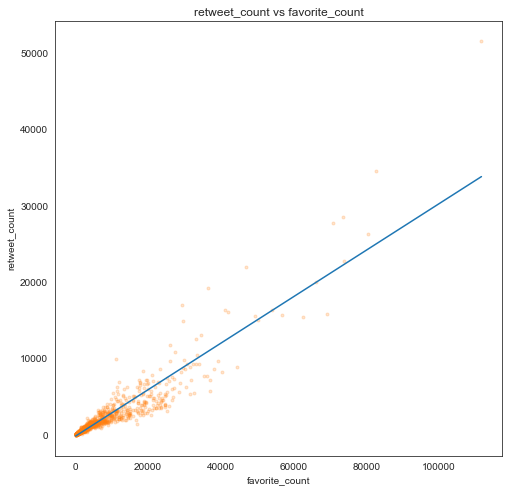

In [33]:
#setting the plot style
sns.set_style('white')

# Plotting a scatterplot to see the relationship between the favorite_count and retweet_count
plt.figure(figsize=(8,8))
plt.plot(df_tweet_data['favorite_count'],df_tweet_data['retweet_count'], 'o',markersize=3, alpha= 0.20, color='#ff7f0e')
plt.plot(x,y)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title("retweet_count vs favorite_count");

##### Observations 
- It can be observed that:
- The retweet_count and favorite_count has a strong positive correlation of 0.9287.
- The point with the highest favorite_count and retweet_count i.e tweet with ``tweet_id`` 807106840509214720, is an outlier. and very far from other data point.
- Most of the datapoint are within the retweet count value of 0 to 10000 and favorite_count value of 0 to 20,000.

#### Analysis Question 2
- What is the most liked tweets

It can be observed that the most liked tweets is the tweet with id number ``807106840509214720``. It has a favorite_count of 111,712 and italso is the most retweeted with a retweet_count of 51,740

In [34]:
df_tweet_data.sort_values(by=['favorite_count'], ascending=False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang
166,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,51663,111681,en
134,819004803107983360,2017-01-11 02:15:36+00:00,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,34539,82711,en
58,859196978902773760,2017-05-02 00:04:57+00:00,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,26278,80585,en
43,870374049280663552,2017-06-01 20:18:38+00:00,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,22750,73956,en
959,678399652199309312,2015-12-20 02:20:55+00:00,Twitter for iPhone,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,28586,73527,en


- **We can also view the image properties of this tweet.**

In [35]:
# viewing the image propertyof this tweet
df_image_data[df_image_data.tweet_id.isin([807106840509214720])]

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed
166,807106840509214720,1,stephan,none,0.51,https://pbs.twimg.com/ext_tw_video_thumb/80710...,chihuahua


- **similarly we can look for the least liked tweet**
We can see that the tweet with the least amount of likes and retweet is the tweet with tweet_id ``666102155909144576``. It has a favorite count of 66 and a retweet_count of 11

In [36]:
df_tweet_data.sort_values(by=['favorite_count']).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang
1061,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,11,66,en
1055,666407126856765440,2015-11-17 00:06:54+00:00,Twitter for iPhone,This is a southern Vesuvius bumblegruff. Can d...,https://twitter.com/dog_rates/status/666407126...,7,10,30,93,en
1065,666058600524156928,2015-11-16 01:01:59+00:00,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,47,99,en


- **We can also view the image properties of this tweet.**

In [37]:
df_image_data[df_image_data.tweet_id.isin([666102155909144576])]

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed
1061,666102155909144576,1,none,none,0.59,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,english_setter


#### Analysis Question 3
- How does time affect the value of retweet_count  and favorite count.

#### TimeFactor
Another interesting point to see is how the time in which the tweets was posted relate with the retweet count and favorite count

##### By year
- We will get the year value from the timestamp column and use it to group the tweets.

In [38]:
#Extracting the year information
df_tweet_data['year']= df_tweet_data['timestamp'].apply(lambda x: x.year)

In [39]:
# find the mean of the retweet_count groped by year
mean_retweetcount_per_year=df_tweet_data.groupby('year')['retweet_count'].mean()
mean_retweetcount_per_year

year
2015     911.597734
2016    2030.795332
2017    4736.784946
Name: retweet_count, dtype: float64

This is a very reasonable value since the platform is growing in recognition and adding on more memebers year on year
we can see that the mean retweet_count doubles every year.

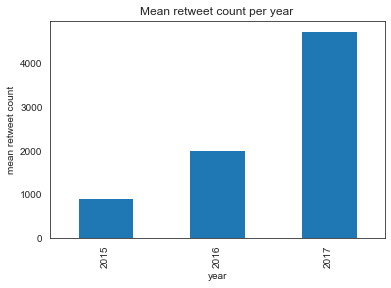

In [40]:
# plot the mean_retweetcount_per_year value against year information.
mean_retweetcount_per_year.plot(kind='bar', ylabel='mean retweet count')
plt.title('Mean retweet count per year');

#### Analysis Question 4
- What is the most common dog breed in our dataset

#### The Most common breed of Dog

In [41]:
# count each breed in the dataset
breed_count=df_image_data['breed'].value_counts(ascending=True).tail()
breed_count

pug                    44
chihuahua              53
labrador_retriever     68
pembroke               71
golden_retriever      105
Name: breed, dtype: int64

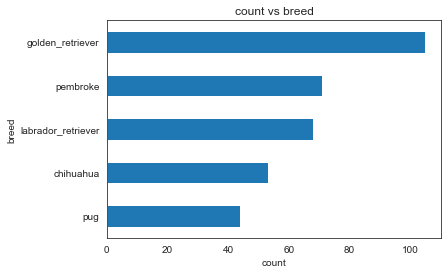

In [42]:
# plot the count vs breed 
breed_count.plot(kind='barh')
plt.title('count vs breed')
plt.xlabel('count')
plt.ylabel('breed')
plt.savefig('common_breed.png',dpi=200, bbox_inches='tight');

- We can see that the most popular dog breed is the **golden retriever**.

##### Golden golden retriever
We can also find the name of the most retweeted golden retriever

In [43]:
# selecting the tweet_id of all golden retrievers
golden_retriever_tweet_id = df_image_data[df_image_data.breed=='golden_retriever']['tweet_id']

In [44]:
# get the retweet count of all golden retrievers from the df_tweet_data DataFrame
retweet_count_golden_retriever = df_tweet_data[df_tweet_data['tweet_id'].isin(golden_retriever_tweet_id)][['tweet_id','retweet_count']]

In [45]:
# get the names of each golden retriever from the df_image_data
names_golden_retriever = df_image_data[df_image_data['tweet_id'].isin(golden_retriever_tweet_id)][['tweet_id','name']]

In [46]:
# merge to form a single DataFrame containing the name of each golden retrievers and the retweet_count
df_golden_retriever = names_golden_retriever.merge(retweet_count_golden_retriever, how= 'inner', on= 'tweet_id' )

In [47]:
#
df_golden_retriever.sort_values(by='retweet_count', ascending= False)

,tweet_id,name,retweet_count
5,870374049280663552,zoey,22750
72,795464331001561088,none,21980
80,733109485275860992,none,15535
26,788908386943430656,lucy,11715
2,882268110199369728,alfy,9630
...,...,...,...
101,666345417576210432,none,124
63,668286279830867968,rusty,118
102,666057090499244032,none,112
99,669327207240699904,none,102


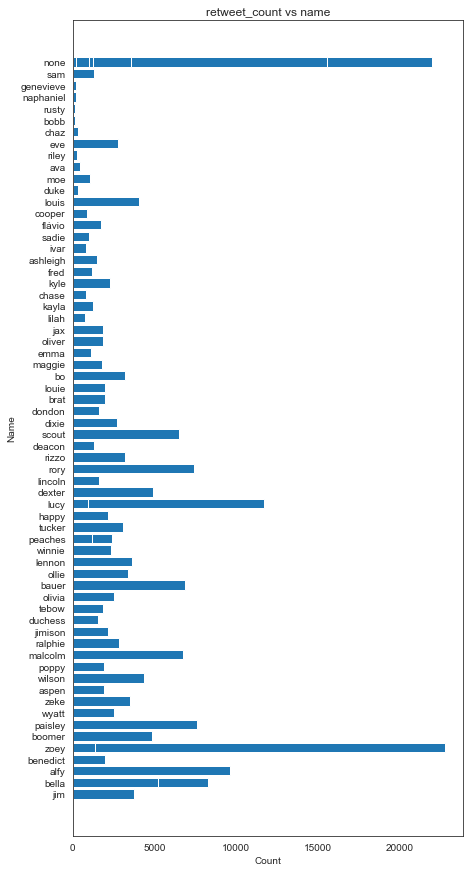

In [48]:
# plotthe retweet_count against the name
plt.figure(figsize=(7,15))
plt.barh(df_golden_retriever['name'], df_golden_retriever['retweet_count'])
plt.title('retweet_count vs name')
plt.xlabel('Count')
plt.ylabel('Name');


- **zoey** is the most retweeted golden retriever

In [49]:
# getting the rows where golden retriever name is zoey in the df_golden_retriver DataFrame
df_golden_retriever[df_golden_retriever.name=='zoey']

,tweet_id,name,retweet_count
5,870374049280663552,zoey,22750
104,859607811541651456,zoey,1365


In [50]:
# fetching the rows for 'zoey' from the df_tweet_data DataFrame using their tweet_id 
tweet_id_list=[870374049280663552,859607811541651456]
df_tweet_data[df_tweet_data.tweet_id.isin(tweet_id_list)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,year
43,870374049280663552,2017-06-01 20:18:38+00:00,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,22750,73956,en,2017
1078,859607811541651456,2017-05-03 03:17:27+00:00,Twitter for iPhone,Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,1365,16842,en,2017


In [51]:
# fetching the rows for 'zoey' from the df_image_data DataFrame using their tweet_id 
df_image_data[df_image_data.tweet_id.isin(tweet_id_list)]

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed
43,870374049280663552,1,zoey,none,2.43,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever
1078,859607811541651456,1,zoey,puppo,1.00,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,golden_retriever


- It is interesting to note that we have two zoeys in our data set that are both golden retriever

##### The Golden golden retriever: 
is **Zoey** the puppo

#### Analysis Question 5
- What is the most popular dog_growth_stage in our dataset
 - 1) The most common dog_growth_stage in our dataset
 - 2) The most retweeted dog_growth_stage by median of the retweet count

#### The most popular dog growth stage

In [52]:
df_retweet_count = df_tweet_data[['tweet_id','retweet_count']]

In [53]:
df_dog_growth_stage = df_image_data[df_image_data['dog_growth_stage']!='none'][['tweet_id','dog_growth_stage']]

In [54]:
df_retweet_count_growth_stage =df_dog_growth_stage.merge(df_retweet_count, how='inner', on='tweet_id')
df_retweet_count_growth_stage

,tweet_id,dog_growth_stage,retweet_count
0,886366144734445568,pupper,2629
1,882762694511734784,pupper,4094
2,881666595344535552,pupper,8956
3,876838120628539392,pupper,2803
4,876120275196170240,puppo,3902
...,...,...,...
179,704054845121142784,pupper,844
180,684225744407494656,pupper,184
181,677716515794329600,pupper,877
182,675853064436391936,pupper,1136


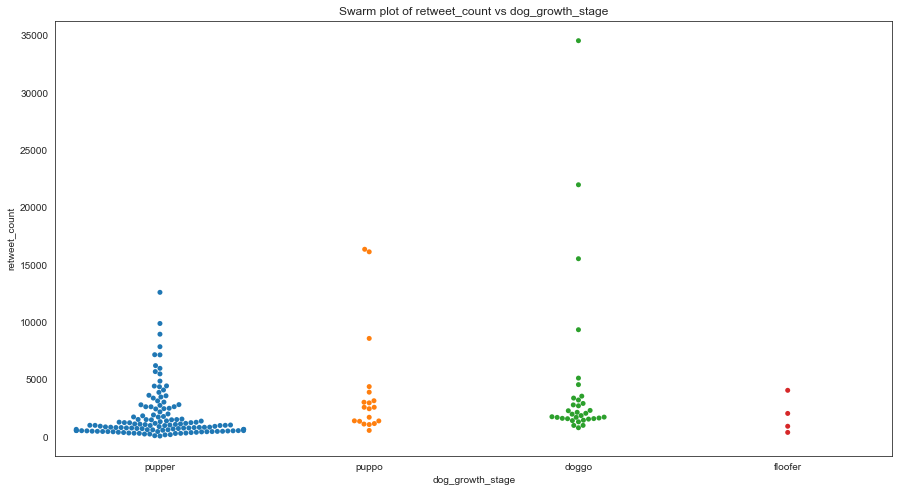

In [55]:
# visualization of the dog_growth stage with respect to their retweet count
plt.figure(figsize=(15,8))
sns.swarmplot(x='dog_growth_stage',y='retweet_count',data=df_retweet_count_growth_stage, size=5)
plt.title('Swarm plot of retweet_count vs dog_growth_stage' );
plt.savefig('dog_growth_stage.png',dpi=200, bbox_inches='tight');

**It can be observed that**
- The **pupper** stage has the most data point in the plot. Therefore, they are the most common in our dataset.
- the **doggo** stage will have a higher mean value for the retweet_count due to the outlier retweet_count value at 35000 retweets.

##### The most common Dog_growth_stage  

In [56]:
common_growth_stage = df_retweet_count_growth_stage['dog_growth_stage'].value_counts()

In [57]:
def plotter(series,k,x,y,t ):

    '''
    plots a graph inserting necessary annotations like xlabel, ylabel and title
    
    Args: 
    series(series) Contains the data point tobe plotted
    k(string) The type of plot
    x(string) The x label value
    y(string) The y label value
    t(string) The title of the plot
    
    
    returns:
    plot The plot object for further customization.
    '''
    plot= series.plot(kind=k)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(t);
    
    return plot

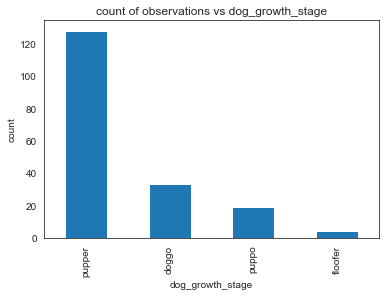

In [58]:
# plotting count of observations vs dog_growth_stage
plotter(common_growth_stage,'bar','dog_growth_stage','count','count of observations vs dog_growth_stage');

 as stated earlier, Pupper is the most common dog_growth_stage in our dataset.

##### The most retweeted dog_growth_stage by median of retweet count

In [59]:
# grouping the retweet count by dog_growth_stage
retweet_count_Per_growth_stage = df_retweet_count_growth_stage.groupby('dog_growth_stage')['retweet_count'].median()

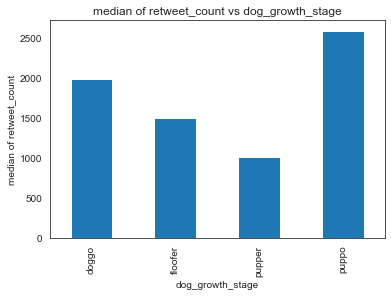

In [60]:
# plotting median of retweet_count vs dog_growth_stage
plotter(retweet_count_Per_growth_stage,'bar','dog_growth_stage','median of retweet_count','median of retweet_count vs dog_growth_stage')
plt.savefig('median_retweet_count_dog_growth_stage.png',dpi=150, bbox_inches='tight');

It can be observed that the puppo stage has the highest median retweet_count of over 2500

#### Analysis Question 6
- How does the tone of the text (negative, neutral or positive), affect the retweet_count and favorite_count.

#### Sentiment Analysis on the text column of the df_tweet_data
We are going to do a sentiment analysis on the tweet_text column to define the emotion behind each text. Then we will group our tweets based on these sentiment scoresand see how the audience responds to different sentiments. 

we will be using roberta pretrained model for this sentiment analysis. 

In [61]:
#importing required libraries
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

#### Note, this cell takes time to load the first time and requires internet connectivity to download the required resources

In [72]:
# Load the roberta pretrained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [74]:
def tweet_polarity_scores(example):
    '''
    Takes a string of text, perform sentiment and analysis and returns its score dictionary
    
    Args:
    example(string) the text on which the sentiment analysis is performed on
    
    returns:
    score_dict(dictionary) The dictionary showing the rating of the text by the model as either negative, neutral or positive 
    
    '''
    
    # use our tokenizer to encode the text
    encoded_text = tokenizer(example, return_tensors = 'pt')

    # run our model on the text
    output = model(**encoded_text)

    # convert the tensor to numpy
    scores = output[0][0].detach().numpy()

    # apply softmax to the score
    scores = softmax(scores)

    # create our score dictionary
    negative = scores[0]
    neutral =  scores[1]
    positive = scores[2]
    
    return negative, neutral, positive
    

#### Sentiment Analysis
performing the sentiment analysis on the text column using the tweet_polarity_scores function.
- **Note** This next three cells takes a some time to load.

In [75]:
#applying the tweet_polarity_score function to the text column of the df_tweet_data DataFrame for negative score
df_tweet_data['negative']=df_tweet_data['text'].apply(lambda x: tweet_polarity_scores(x)[0])

In [76]:
#applying the tweet_polarity_score function to the text column of the df_tweet_data DataFrame for neutral score
df_tweet_data['neutral']=df_tweet_data['text'].apply(lambda x: tweet_polarity_scores(x)[1])

In [77]:
#applying the tweet_polarity_score function to the text column of the df_tweet_data DataFrame for positive score
df_tweet_data['positive'] = df_tweet_data['text'].apply(lambda x: tweet_polarity_scores(x)[2])

- Based on the ratings from the model, we will categories each text into negative, neutral or positive sentiments.

In [78]:
def sentiment_categorizer(df) :
    '''
    defines the sentiment of the text as the sentiment with the highest rating by the model.
    
    Args:
    df(DataFrame) the dataframe containing the three sentiment ratings per text, i.e negative, neutral or positive
    
    Return:
    df(DataFrame) the data fram ewith an extra column 'sentiment' containing the defintion of the sentiment of the text. i.e negative, neutral, or positive.
    
    '''
    
    # returns the sentiment and the model rating for that sentiment 
    df['sentiment_int'] = df.apply(lambda x: ['negative',x.loc['negative']] if x.loc['negative'] > x.loc['neutral'] else ['neutral', x.loc['neutral']], axis =1)

    # extract the sentiment and the model rating into separate columns
    df['sentiment_int_sent'] = df['sentiment_int'].apply(lambda x: x[0])
    df['sentiment_rating']= df['sentiment_int'].apply(lambda x: x[1])

    # compare the values in the previous two columns against the positive column.
    df['sentiment'] = df.apply(lambda x: x.loc['sentiment_int_sent'] if x.loc['sentiment_rating'] > x.loc['positive'] else 'positive', axis=1 )
    
    # dropping the intermediate column
    df= df.drop(['sentiment_int','sentiment_int_sent','sentiment_rating'], axis=1)
    
    # convert the sentiment column to categorical variable
    df.sentiment.astype('category')
    
    return df

In [79]:
# running the sentiment categorizer function on the df_tweet_data
df_tweet_data = sentiment_categorizer(df_tweet_data)

In [80]:
df_tweet_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,year,negative,neutral,positive,sentiment
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,3478,22045,en,2017,0.095379,0.668821,0.235800,neutral
1,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,7224,36929,en,2017,0.032698,0.371503,0.595800,positive
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,7757,35308,en,2017,0.068925,0.437913,0.493162,positive
3,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,3619,24520,en,2017,0.364550,0.502714,0.132736,neutral
4,890006608113172480,2017-07-26 00:31:25+00:00,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,6151,27033,en,2017,0.410193,0.395136,0.194671,negative


In [81]:
# Storing the sentiment analysed dataset 
df_tweet_data.to_csv('tweet_data_with_sentiments_Analysed.csv', index=False)

##### The most prevalent sentiment from our dataset.

In [82]:
# value count of the sentiment column.
prevalent_sentiment=df_tweet_data.sentiment.value_counts()
prevalent_sentiment

positive    515
negative    297
neutral     284
Name: sentiment, dtype: int64

In [83]:
df_tweet_data.sentiment.value_counts(normalize = True)

positive    0.469891
negative    0.270985
neutral     0.259124
Name: sentiment, dtype: float64

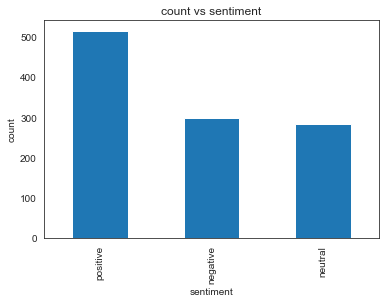

In [84]:
#plot a graph of count against the sentiment type.
plotter(prevalent_sentiment,'bar','sentiment','count','count vs sentiment');

- It can be observed that 515 out of the 1096 tweets are on a positive note. that is, 46.9% of the total tweets analysed.

- Mean retweet_count per sentiment category.  

In [85]:
# mean of retweet count grouped by sentiment
mean_retweet_count_by_sentiment = df_tweet_data.groupby('sentiment')['retweet_count'].mean()
mean_retweet_count_by_sentiment 

sentiment
negative    1955.104377
neutral     1940.260563
positive    2334.541748
Name: retweet_count, dtype: float64

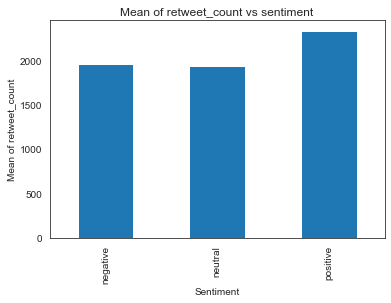

In [86]:
# plot the mean of retweet count vs sentiment
plotter(mean_retweet_count_by_sentiment,'bar','Sentiment','Mean of retweet_count','Mean of retweet_count vs sentiment');

- generally, tweets with positive sentiments tends to get more retweets and likes than tweets with neutral or negative sentiment
- Tweets with neutral sentiment tends to get the least retweets and likes.

In [87]:
df_tweet_data.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,year,negative,neutral,positive
count,1.096000e+03,1096.000000,1096.0,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,7.362894e+17,10.670620,10.0,2129.552007,7551.432482,2015.847628,0.261360,0.289408,0.449232
std,6.720513e+16,2.029934,0.0,3454.215906,10530.418482,0.684835,0.317869,0.213850,0.369335
min,6.660293e+17,0.000000,10.0,11.000000,66.000000,2015.000000,0.000664,0.006090,0.002459
25%,6.758663e+17,10.000000,10.0,480.250000,1659.000000,2015.000000,0.005400,0.089217,0.081997
50%,7.095427e+17,11.000000,10.0,1094.500000,3526.000000,2016.000000,0.080149,0.265689,0.392334
75%,7.866760e+17,12.000000,10.0,2530.250000,9310.750000,2016.000000,0.491033,0.451155,0.843200
max,8.918152e+17,14.000000,10.0,51663.000000,111681.000000,2017.000000,0.978529,0.876490,0.992235


- **here is the max value for each of the sentiment ratings**
-  Max negative rating= 0.978529
-  Max neutral rating= 0.876490
-  Max positive rating= 0.992235

#### The most positive tweets


In [88]:
# The 5 best rated positive tweets by the roberta model
most_positive = df_tweet_data.sort_values(by='positive',ascending=False).head()

most_positive

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,year,negative,neutral,positive,sentiment
935,686730991906516992,2016-01-12 02:06:41+00:00,Twitter for iPhone,I just love this picture. 12/10 lovely af http...,https://twitter.com/dog_rates/status/686730991...,12,10,1093,3814,en,2016,0.001675,0.006090,0.992235,positive
950,681231109724700672,2015-12-27 21:52:07+00:00,Twitter for iPhone,I just love this pic. 11/10 this pupper is goi...,https://twitter.com/dog_rates/status/681231109...,11,10,441,2243,en,2015,0.001142,0.007505,0.991353,positive
959,678399652199309312,2015-12-20 02:20:55+00:00,Twitter for iPhone,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,28586,73527,en,2015,0.001166,0.007840,0.990994,positive
1017,671561002136281088,2015-12-01 05:26:34+00:00,Twitter for iPhone,This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,13,10,6324,11395,en,2015,0.001328,0.008596,0.990077,positive
1061,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,11,66,en,2015,0.001254,0.008944,0.989801,positive


#### The most negative tweets


In [89]:
# The 5 best rated negative tweets by the roberta model
most_negative = df_tweet_data.sort_values(by='negative', ascending=False).head()
most_negative


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,year,negative,neutral,positive,sentiment
574,678798276842360832,2015-12-21 04:44:55+00:00,Twitter for iPhone,This is Linda. She fucking hates trees. 7/10 h...,https://twitter.com/dog_rates/status/678798276...,7,10,1030,3166,en,2015,0.978529,0.018430,0.003042,negative
169,806219024703037440,2016-12-06 19:29:28+00:00,Twitter for iPhone,We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,1134,6133,en,2016,0.974866,0.022647,0.002487,negative
293,758854675097526272,2016-07-29 02:40:28+00:00,Twitter for iPhone,This is Lilli Bee &amp; Honey Bear. Unfortunat...,https://twitter.com/dog_rates/status/758854675...,11,10,842,3327,en,2016,0.973334,0.023941,0.002726,negative
6,889278841981685760,2017-07-24 00:19:32+00:00,Twitter for iPhone,This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,4443,22113,en,2017,0.973250,0.024291,0.002459,negative
238,779834332596887552,2016-09-25 00:06:08+00:00,Twitter for iPhone,This is Scout. He really wants to kiss himself...,https://twitter.com/dog_rates/status/779834332...,11,10,6504,17772,en,2016,0.972829,0.024387,0.002785,negative


#### The most neutral tweets

In [90]:
# The 5 best rated neutral tweets by the roberta model
most_neutral = df_tweet_data.sort_values(by='neutral', ascending=False).head()
most_neutral

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,year,negative,neutral,positive,sentiment
686,670421925039075328,2015-11-28 02:00:17+00:00,Twitter for iPhone,Meet Herb. 12/10 https://t.co/tLRyYvCci3,https://twitter.com/dog_rates/status/670421925...,12,10,552,1148,en,2015,0.012504,0.876490,0.111006,neutral
1050,667044094246576128,2015-11-18 18:17:59+00:00,Twitter for iPhone,12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,12,10,43,163,en,2015,0.070635,0.862236,0.067130,neutral
1031,670319130621435904,2015-11-27 19:11:49+00:00,Twitter for iPhone,AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,https://twitter.com/dog_rates/status/670319130...,11,10,1067,3470,en,2015,0.057551,0.861079,0.081370,neutral
994,674790488185167872,2015-12-10 03:19:24+00:00,Twitter for iPhone,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,https://twitter.com/dog_rates/status/674790488...,13,10,219,986,nl,2015,0.060725,0.859460,0.079816,neutral
1076,677716515794329600,2015-12-18 05:06:23+00:00,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,0,10,877,2785,en,2015,0.054110,0.841782,0.104108,neutral


#### The best in class tweets

In [91]:
best_in_class_tweets = pd.concat([most_negative,most_neutral,most_positive], ignore_index=True)

In [92]:
best_in_class_tweets

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,year,negative,neutral,positive,sentiment
0,678798276842360832,2015-12-21 04:44:55+00:00,Twitter for iPhone,This is Linda. She fucking hates trees. 7/10 h...,https://twitter.com/dog_rates/status/678798276...,7,10,1030,3166,en,2015,0.978529,0.018430,0.003042,negative
1,806219024703037440,2016-12-06 19:29:28+00:00,Twitter for iPhone,We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,1134,6133,en,2016,0.974866,0.022647,0.002487,negative
2,758854675097526272,2016-07-29 02:40:28+00:00,Twitter for iPhone,This is Lilli Bee &amp; Honey Bear. Unfortunat...,https://twitter.com/dog_rates/status/758854675...,11,10,842,3327,en,2016,0.973334,0.023941,0.002726,negative
3,889278841981685760,2017-07-24 00:19:32+00:00,Twitter for iPhone,This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,4443,22113,en,2017,0.973250,0.024291,0.002459,negative
4,779834332596887552,2016-09-25 00:06:08+00:00,Twitter for iPhone,This is Scout. He really wants to kiss himself...,https://twitter.com/dog_rates/status/779834332...,11,10,6504,17772,en,2016,0.972829,0.024387,0.002785,negative
5,670421925039075328,2015-11-28 02:00:17+00:00,Twitter for iPhone,Meet Herb. 12/10 https://t.co/tLRyYvCci3,https://twitter.com/dog_rates/status/670421925...,12,10,552,1148,en,2015,0.012504,0.876490,0.111006,neutral
6,667044094246576128,2015-11-18 18:17:59+00:00,Twitter for iPhone,12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,12,10,43,163,en,2015,0.070635,0.862236,0.067130,neutral
7,670319130621435904,2015-11-27 19:11:49+00:00,Twitter for iPhone,AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,https://twitter.com/dog_rates/status/670319130...,11,10,1067,3470,en,2015,0.057551,0.861079,0.081370,neutral
8,674790488185167872,2015-12-10 03:19:24+00:00,Twitter for iPhone,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,https://twitter.com/dog_rates/status/674790488...,13,10,219,986,nl,2015,0.060725,0.859460,0.079816,neutral
9,677716515794329600,2015-12-18 05:06:23+00:00,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,0,10,877,2785,en,2015,0.054110,0.841782,0.104108,neutral


In [93]:
# extracting the tweet_id from the tweet_id column of the best_in_class_tweets DataFrame.
tweet_id=[]
for tweet in best_in_class_tweets['tweet_id']:
    tweet_id.append(tweet)

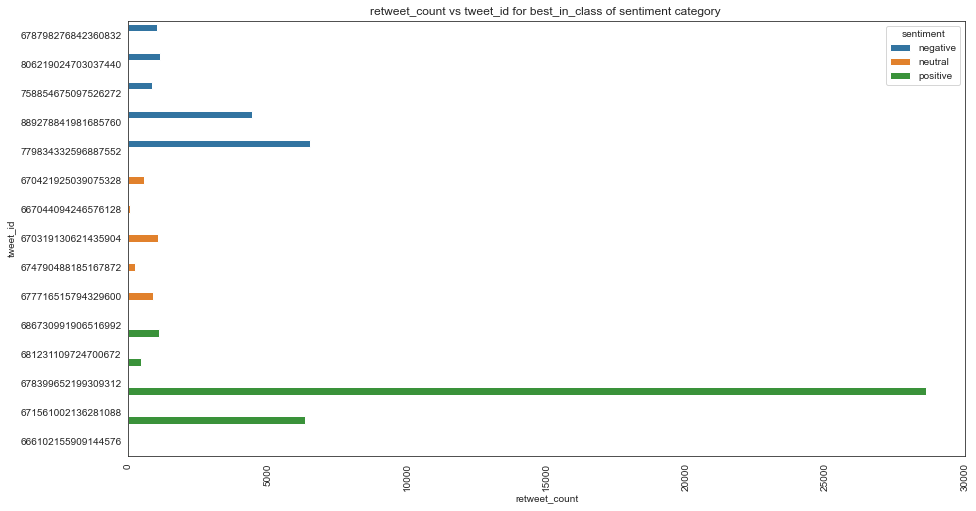

In [94]:
# plotting a barplot of the retweet_count by sentiment of the best_in_class_tweets DataFrame.
plt.figure(figsize=(15,8))
sns.barplot(x='retweet_count',y='tweet_id', data = best_in_class_tweets, hue='sentiment',order=tweet_id, orient='h' )
plt.tick_params(axis='x',rotation=90)
plt.title('retweet_count vs tweet_id for best_in_class of sentiment category ')
plt.savefig('best_in_class_of_sentiment_category.png',dpi=200, bbox_inches='tight');

#### Some observation
- The most retweeted positivey rated tweet was a tweet with tweet_id **678399652199309312** it has a retweet_count value of **28,631**. in the year **2015** where the mean retweet_count was **912.711048**
- Negative tweets tend to get more retweets on average than neutral and positive tweets
- Neutral tweets gets the least response from the audience as compared to postive and negative tweets.

####  Our star tweet
- The tweet  **678399652199309312** is about 

In [95]:
df_star_tweet = df_image_data[df_image_data['tweet_id'].isin([678399652199309312])]

In [96]:
# the text from our star tweet.
star_tweet=[]
for text in best_in_class_tweets['text']:
    star_tweet.append(text)

In [97]:
# the super text
star_tweet[12]

'This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm'

In [98]:
# The jpg_url for our star tweet
df_star_tweet['jpg_url'].apply(lambda x: x) 

959    https://pbs.twimg.com/ext_tw_video_thumb/67839...
Name: jpg_url, dtype: object

In [99]:
# The image information about our star tweet
df_image_data[df_image_data['tweet_id']==678399652199309312]

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed
959,678399652199309312,1,none,none,0.41,https://pbs.twimg.com/ext_tw_video_thumb/67839...,great_pyrenees


**here is our lovely little great_pyreness**.Too bad we have no name for **pupper**

In [100]:
# import image module
from IPython.display import Image
  
# get the image
Image(url='https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg', width=300, height=300)

#### Analysis Question 7
- who are the best in class by value of retweet_count?
    - Dog breed

### Best in Class

We will be considering the most retweeted  dog by the number of retweet they got grouped by :
- Dog growth stage
- Breed

In [101]:
def best_in_class_picker(df,df_2,category_type,dog_type):
    '''
    creates a DataFrame containing the dog category of interest and picks the best in class from the category
    
    Args
    df(DataFrame): Contains the dog image information like breed and dog growth stage
    df_2(DataFrame): Contains the retweet_count and also have the key field for merging i.e,the tweet_id
    category(string): The dog category of interest
    dog_type(string): The value of interest from the dog category
    
    
    returns:
    df_merged(DataFrame): The table containing the the dog image information together with the retweet_count 
    best_in_class(series): Information of the best_in_class
    
    
    '''
    
    
    # The best in class by dog_growth_stage pupper
    dog_growth_stage = df[df[category_type]== dog_type]

    # get the retweet_count from df_tweet_data
    retweet_count=df_2[df_2['tweet_id'].isin(df['tweet_id'])][['tweet_id','text','retweet_count','favorite_count']]

    # merge the retweet_count withthe dog_growth_stage 
    df_merged = dog_growth_stage.merge(retweet_count, how='inner', on='tweet_id' )

    # picked the most retweeted 
    best_in_class=df_merged[df_merged['retweet_count']==df_merged['retweet_count'].max()]
    best_in_class=best_in_class.reset_index(drop=True)
    
    return(df_merged,best_in_class)


In [102]:
def category_swamplotter(df,dog_category,title):
    plt.figure(figsize=(17,7))
    sns.swarmplot(x=dog_category,y='retweet_count',data=df, size=3.5)
    plt.title(title);

In [103]:
def best_in_class_details(category,best_in_class):
    '''
    Prints the best in class information to the console
    
    Args:
    category(string): The category for which the dog is best in class
    best_in_class(series): The pandas series containing the details of the best in class
    
    returns:
    
    '''
    # unpack the required information from the series
    
    
    class_cat = category
    tweet_id =  best_in_class.loc[0].at['tweet_id']
    
    name = best_in_class.loc[0].at['name']
    growth_stage = best_in_class.loc[0].at['dog_growth_stage']
    breed = best_in_class.loc[0].at['breed']
    text = best_in_class.loc[0].at['text']
    retweet_count = best_in_class.loc[0].at['retweet_count']
    favorite_count = best_in_class.loc[0].at['favorite_count']
   
    
    if name=='none':
        name='not available'
    if growth_stage=='none':
        growth_stage='not available'

    print(f'The best in class for class {class_cat}')
    print(f'Tweet_id: {tweet_id}')
    print(f'Dog name: {name}')
    print(f'Dog growth_stage: {growth_stage}')
    print(f'Dog breed: {breed}')
    print(f'tweet_text:{text}')
    print(f'retweet_count:{retweet_count}')
    print(f'favorite_count:{favorite_count}')

In [104]:
# dog_growth_stage value_count.
df_image_data['dog_growth_stage'].value_counts()


none       912
pupper     128
doggo       33
puppo       19
floofer      4
Name: dog_growth_stage, dtype: int64

**dog growth stages to be considered**
- `none`(Those without a defined dog growth stage). There are  912 in this category

- `pupper` There are 128 in this category

- `doggo`  There are 33 in this category

- `puppo` There are 19 in this category

- `floofer` There are 4 in this category

#### pupper

In [105]:
# Finding the best_in_class of puppers 
df_pupper,best_in_class_pupper=best_in_class_picker(df_image_data,df_tweet_data,'dog_growth_stage','pupper')

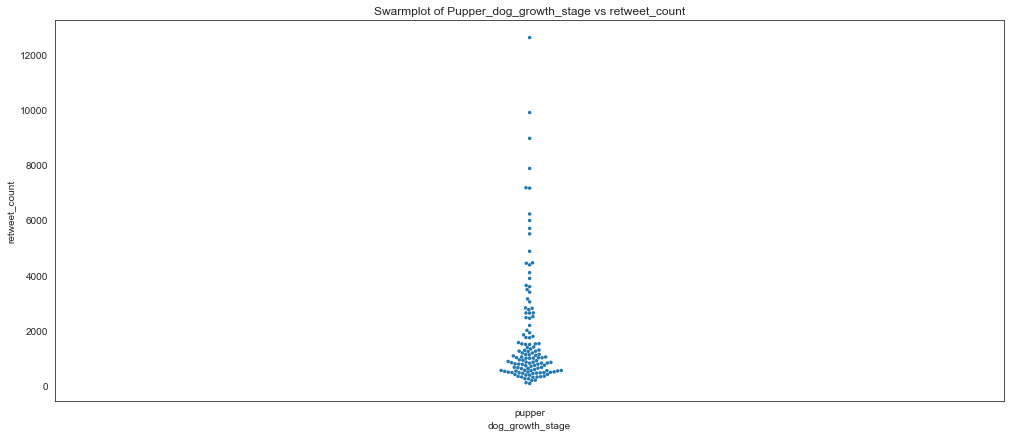

In [106]:
# The swarm plot of the pupper dog_growth_stage 
category_swamplotter(df_pupper,'dog_growth_stage','Swarmplot of Pupper_dog_growth_stage vs retweet_count')

In [107]:
best_in_class_pupper

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,679828447187857408,3,none,pupper,1.05,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,chihuahua,Everybody look at this beautiful pupper 13/10 ...,12605,33187


In [108]:
# We will display the details of best in class of pupper
best_in_class_details('pupper',best_in_class_pupper)

The best in class for class pupper
Tweet_id: 679828447187857408
Dog name: not available
Dog growth_stage: pupper
Dog breed: chihuahua
tweet_text:Everybody look at this beautiful pupper 13/10 https://t.co/hyAC5Hq9GC
retweet_count:12605
favorite_count:33187


#### Here is our star pupper

In [109]:
# get the image url
url= best_in_class_pupper.loc[0].at['jpg_url']
# display the image of our star pupper
Image(url=url, width=300, height=300)

- Too bad we don't know the name of this beautiful pupper. However, he is the best in his class of **pupper**, he has 12,628 retweets and loved by over 33,231 people on twitter.

#### doggo

In [110]:
# Finding the best_in_class of doggo 
df_doggo,best_in_class_doggo=best_in_class_picker(df_image_data,df_tweet_data,'dog_growth_stage','doggo')

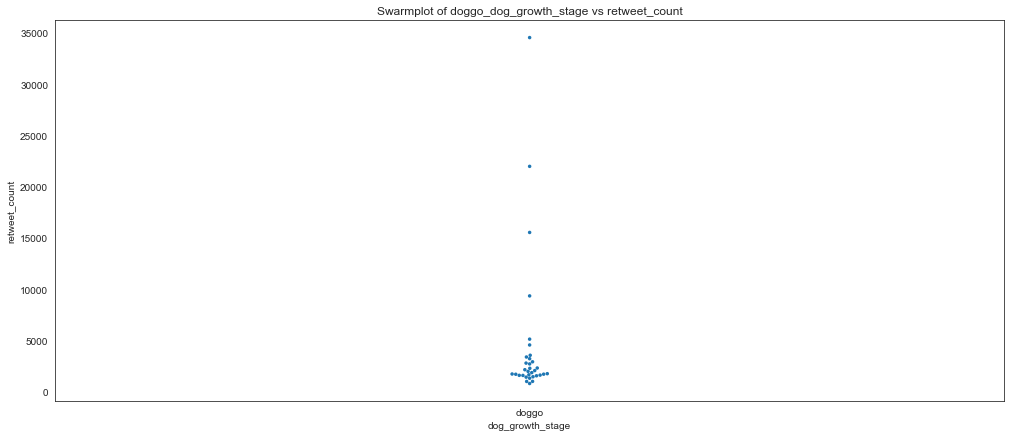

In [111]:
# The swarm plot of the doggo dog_growth_stage 
category_swamplotter(df_doggo,'dog_growth_stage','Swarmplot of doggo_dog_growth_stage vs retweet_count')

In [112]:
best_in_class_doggo

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,819004803107983360,1,bo,doggo,0.72,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,This is Bo. He was a very good First Doggo. 14...,34539,82711


In [113]:
# We will display the details of best in class of doggo
best_in_class_details('doggo',best_in_class_doggo)

The best in class for class doggo
Tweet_id: 819004803107983360
Dog name: bo
Dog growth_stage: doggo
Dog breed: standard_poodle
tweet_text:This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
retweet_count:34539
favorite_count:82711


#### Here is our doggo

In [114]:
# get the image url
url= best_in_class_doggo.loc[0].at['jpg_url']
# display the image of our star pupper
Image(url=url, width=300, height=300)

- Here is **Bo** the best in his class doggo, loved by over 82,680 people on twitter and retweeted 34,578 times

#### puppo

In [115]:
# Finding the best_in_class of doggo 
df_puppo,best_in_class_puppo=best_in_class_picker(df_image_data,df_tweet_data,'dog_growth_stage','puppo')

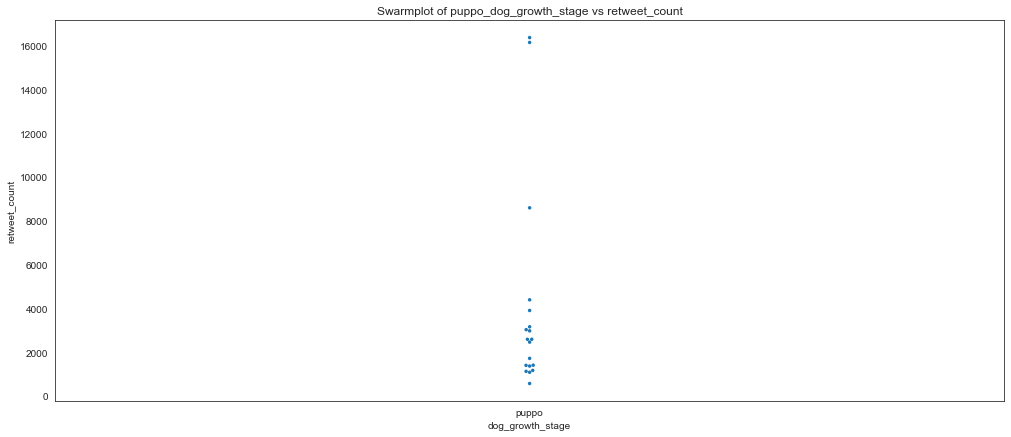

In [116]:
# The swarm plot of the puppo dog_growth_stage 
category_swamplotter(df_puppo,'dog_growth_stage','Swarmplot of puppo_dog_growth_stage vs retweet_count')

In [117]:
best_in_class_puppo

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,825535076884762624,1,none,puppo,3.15,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,rottweiler,Here's a very loving and accepting puppo. Appe...,16359,53990


In [118]:
# We will display the details of best in class of puppo
best_in_class_details('puppo',best_in_class_puppo)

The best in class for class puppo
Tweet_id: 825535076884762624
Dog name: not available
Dog growth_stage: puppo
Dog breed: rottweiler
tweet_text:Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1
retweet_count:16359
favorite_count:53990


#### here is our puppo

In [119]:
# get the image url
url= best_in_class_puppo.loc[0].at['jpg_url']
# display the image of our star pupper
Image(url=url, width=300, height=300)

- Again, our puppo's name is not known but he is the best in his class. he is loved by over 54,004 people on twitter.

#### floofer

In [120]:
# Finding the best_in_class of floofer 
df_floofer,best_in_class_floofer=best_in_class_picker(df_image_data,df_tweet_data,'dog_growth_stage','floofer')

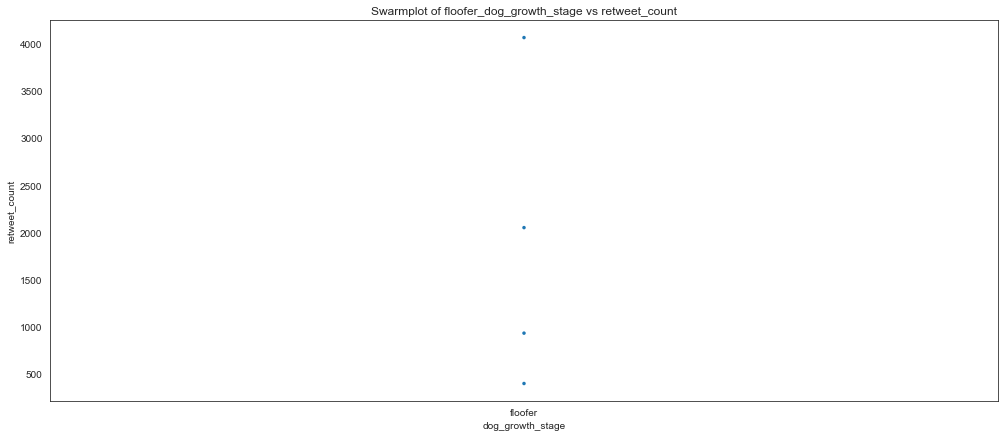

In [121]:
# The swarm plot of the floofer dog_growth_stage 
category_swamplotter(df_floofer,'dog_growth_stage','Swarmplot of floofer_dog_growth_stage vs retweet_count')

In [122]:
best_in_class_floofer

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,737445876994609152,1,none,floofer,0.89,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,samoyed,Just wanted to share this super rare Rainbow F...,4065,9463


In [123]:
# We will display the details of best in class of floofer
best_in_class_details('floofer',best_in_class_floofer)

The best in class for class floofer
Tweet_id: 737445876994609152
Dog name: not available
Dog growth_stage: floofer
Dog breed: samoyed
tweet_text:Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af https://t.co/CaG9MzD3WT
retweet_count:4065
favorite_count:9463


#### Here is our floofer

In [124]:
# get the image url
url= best_in_class_floofer.loc[0].at['jpg_url']
# display the image of our star pupper
Image(url=url, width=300, height=300)
url

'https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg'

Although, they are just 4 in their class, yet it is never easy to be the best in class. The best in the class of floofer loved by over 9476 people on tweeter

#### Lets also consider the category of those whose growth stage were not defined (none)

In [125]:
# Finding the best_in_class of none 
df_none,best_in_class_none=best_in_class_picker(df_image_data,df_tweet_data,'dog_growth_stage','none')

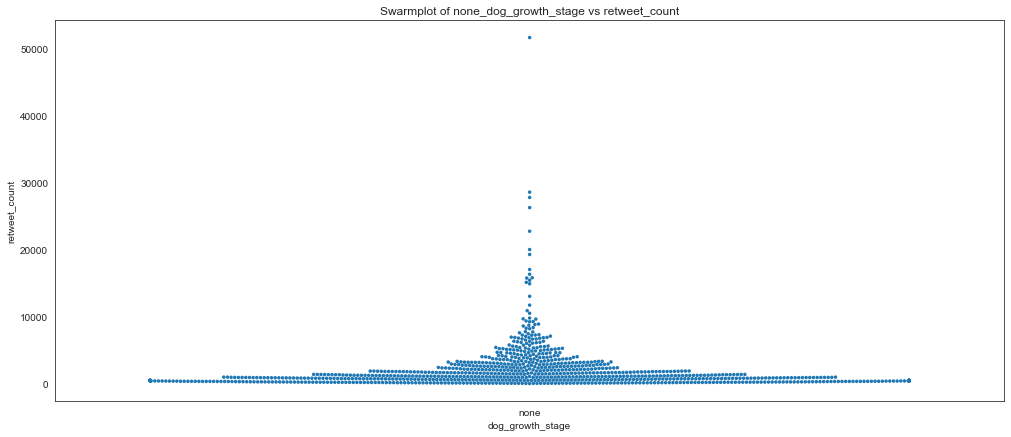

In [126]:
# The swarm plot of the puppo dog_growth_stage 
category_swamplotter(df_none,'dog_growth_stage','Swarmplot of none_dog_growth_stage vs retweet_count')

In [127]:
best_in_class_none

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,807106840509214720,1,stephan,none,0.51,https://pbs.twimg.com/ext_tw_video_thumb/80710...,chihuahua,This is Stephan. He just wants to help. 13/10 ...,51663,111681


In [128]:
# We will display the details of best in class of none
best_in_class_details('none',best_in_class_none)

The best in class for class none
Tweet_id: 807106840509214720
Dog name: stephan
Dog growth_stage: not available
Dog breed: chihuahua
tweet_text:This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
retweet_count:51663
favorite_count:111681


- Here is **stephan**. I think he is a puppo. What do you think?

In [129]:
# get the image url
url= best_in_class_none.loc[0].at['jpg_url']
# display the image of our star none
Image(url=url, width=300, height=300)

- **Stephan** truly deserve recognition. He is so good, he got 111,712 likes on twitter. He has also been retweeted over 51740 times.

### Breed

The list of dog breed in our dataset is very rich. We will consider the best in class for the first five most common breeds.

In [130]:
df_image_data.breed.value_counts().sample(10)

miniature_schnauzer             5
silky_terrier                   1
tibetan_mastiff                 5
malamute                       20
labrador_retriever             68
wire-haired_fox_terrier         2
standard_schnauzer              1
soft-coated_wheaten_terrier     3
walker_hound                    4
flat-coated_retriever           8
Name: breed, dtype: int64

#### golden retriever

In [131]:
# Finding the best_in_class of golden_retriever 
df_golden_retriever,best_in_class_golden_retriever=best_in_class_picker(df_image_data,df_tweet_data,'breed','golden_retriever')

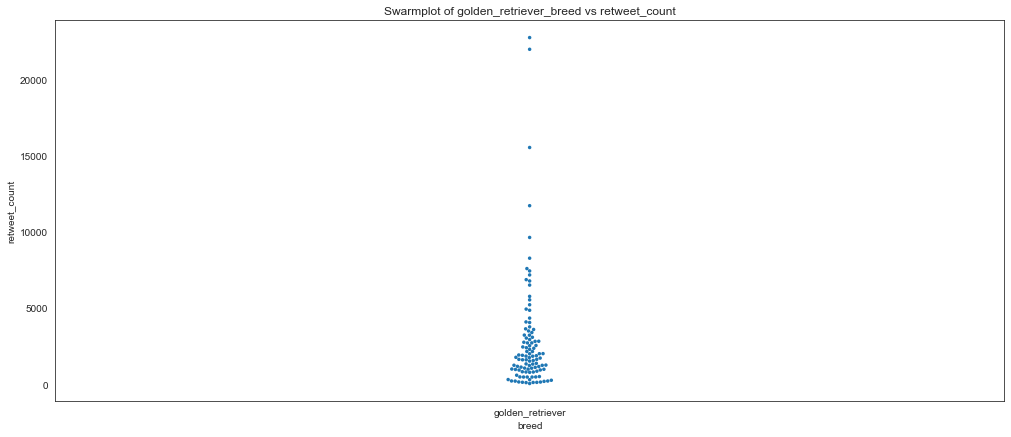

In [132]:
# The swarm plot of the golden_retriever breed
category_swamplotter(df_golden_retriever,'breed','Swarmplot of golden_retriever_breed vs retweet_count')

In [133]:
best_in_class_golden_retriever

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,870374049280663552,1,zoey,none,2.43,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,This is Zoey. She really likes the planet. Wou...,22750,73956


In [134]:
# We will display the details of best in class of golden_retriever
best_in_class_details('golden_retriever',best_in_class_golden_retriever)

The best in class for class golden_retriever
Tweet_id: 870374049280663552
Dog name: zoey
Dog growth_stage: not available
Dog breed: golden_retriever
tweet_text:This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm
retweet_count:22750
favorite_count:73956


Here is our **Golden** golden_retriever

In [135]:
# get the image url
url= best_in_class_golden_retriever.loc[0].at['jpg_url']
# display the image of our star golden_retriever
Image(url=url, width=300, height=300)


Here is **Zoey** The most popular golden_retriever. He got over **73,984** likes on twitter. He has been retweeted 22,767 times

#### Pembroke

In [136]:
# Finding the best_in_class of pembroke 
df_pembroke,best_in_class_pembroke=best_in_class_picker(df_image_data,df_tweet_data,'breed','pembroke')

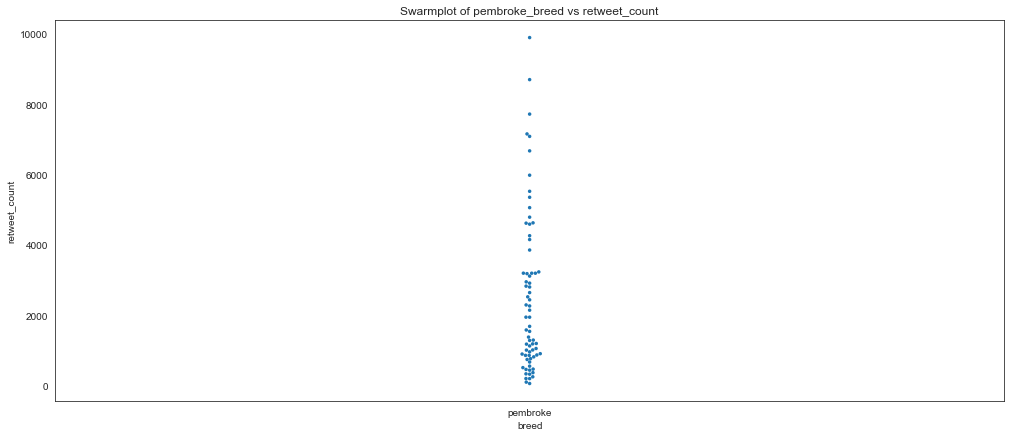

In [137]:
# The swarm plot of the penbroke breed
category_swamplotter(df_pembroke,'breed','Swarmplot of pembroke_breed vs retweet_count')

In [138]:
best_in_class_pembroke

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,824325613288833024,1,none,pupper,0.2,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,pembroke,Retweet the h*ck out of this 13/10 pupper #Bel...,9890,11184


In [139]:
# We will display the details of best in class of pembroke
best_in_class_details('pembroke',best_in_class_pembroke)

The best in class for class pembroke
Tweet_id: 824325613288833024
Dog name: not available
Dog growth_stage: pupper
Dog breed: pembroke
tweet_text:Retweet the h*ck out of this 13/10 pupper #BellLetsTalk https://t.co/wBmc7OaGvS
retweet_count:9890
favorite_count:11184


Here is our **pembroke**

In [140]:
# get the image url
url= best_in_class_pembroke.loc[0].at['jpg_url']
# display the image of our star pembroke
Image(url=url, width=300, height=300)

Wow! is't this lovely! she got 11,197 likes on twitter. indeed she is lovely. The best in class of pembroke.

#### labrador_retriever

In [141]:
# Finding the best_in_class of labrador_retriever
df_labrador_retriever,best_in_class_labrador_retriever=best_in_class_picker(df_image_data,df_tweet_data,'breed','labrador_retriever')

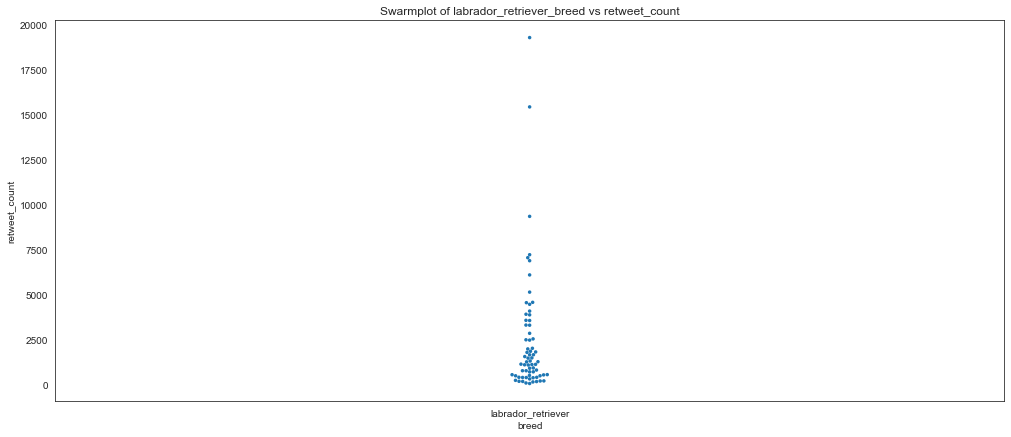

In [142]:
# The swarm plot of the labrador_retriever breed
category_swamplotter(df_labrador_retriever,'breed','Swarmplot of labrador_retriever_breed vs retweet_count')

In [143]:
best_in_class_labrador_retriever

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,739544079319588864,1,none,none,0.79,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,labrador_retriever,This... is a Tyrannosaurus rex. We only rate d...,19278,36507


In [144]:
# We will display the details of best in class of labrador_retriever
best_in_class_details('labrador_retriever',best_in_class_labrador_retriever)

The best in class for class labrador_retriever
Tweet_id: 739544079319588864
Dog name: not available
Dog growth_stage: not available
Dog breed: labrador_retriever
tweet_text:This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P
retweet_count:19278
favorite_count:36507


In [145]:
# get the image url
url= best_in_class_labrador_retriever.loc[0].at['jpg_url']
# display the image of our star labrador_retriever
Image(url=url, width=300, height=300)

Here is an aqua pupper labrador retriever. The best in his class. Enjoying some chilling time in the pool. Loved by more than 36,508 people on twitter and retweeted 19305 times.

#### chihuahua

In [146]:
# Finding the best_in_class of chihuahua
df_chihuahua,best_in_class_chihuahua=best_in_class_picker(df_image_data,df_tweet_data,'breed','chihuahua')

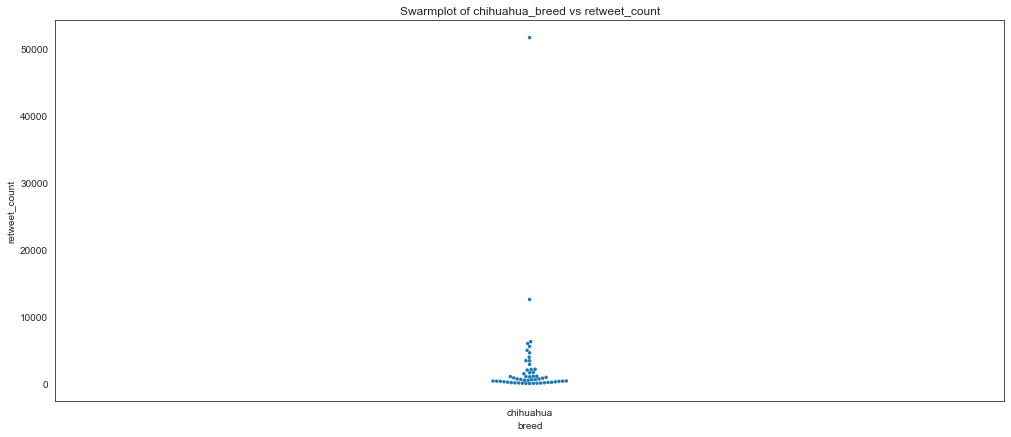

In [147]:
# The swarm plot of the chihuahua breed
category_swamplotter(df_chihuahua,'breed','Swarmplot of chihuahua_breed vs retweet_count')

In [148]:
best_in_class_chihuahua

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,807106840509214720,1,stephan,none,0.51,https://pbs.twimg.com/ext_tw_video_thumb/80710...,chihuahua,This is Stephan. He just wants to help. 13/10 ...,51663,111681


In [149]:
# We will display the details of best in class of labrador_retriever
best_in_class_details('chihuahua',best_in_class_chihuahua)

The best in class for class chihuahua
Tweet_id: 807106840509214720
Dog name: stephan
Dog growth_stage: not available
Dog breed: chihuahua
tweet_text:This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
retweet_count:51663
favorite_count:111681


In [150]:
# get the image url
url= best_in_class_chihuahua.loc[0].at['jpg_url']
# display the image of our star chihuahua
Image(url=url, width=300, height=300)

Here again is Stephan. leading his class. The best of chihuahuas and indeed the overall best. 111,712 likes, 51,740 retweets.

#### pug

In [151]:
# Finding the best_in_class of pug
df_pug,best_in_class_pug = best_in_class_picker(df_image_data,df_tweet_data,'breed','pug')

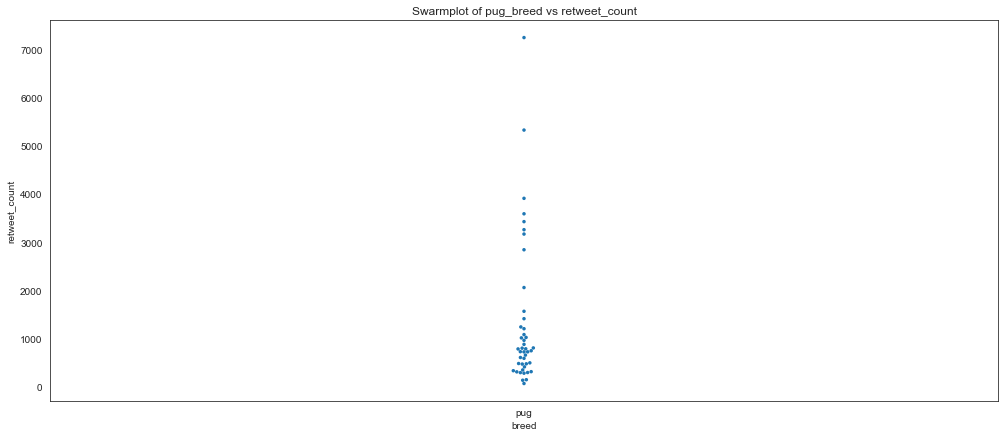

In [152]:
# The swarm plot of the pug breed
category_swamplotter(df_pug,'breed','Swarmplot of pug_breed vs retweet_count')

In [153]:
best_in_class_pug

,tweet_id,img_num,name,dog_growth_stage,img_resolution_MP,jpg_url,breed,text,retweet_count,favorite_count
0,679158373988876288,1,rubio,none,0.17,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,pug,This is Rubio. He has too much skin. 11/10 htt...,7247,19447


In [154]:
# We will display the details of best in class of pug
best_in_class_details('pug',best_in_class_pug)

The best in class for class pug
Tweet_id: 679158373988876288
Dog name: rubio
Dog growth_stage: not available
Dog breed: pug
tweet_text:This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag
retweet_count:7247
favorite_count:19447


Here is our pug.

In [155]:
# get the image url
url= best_in_class_pug.loc[0].at['jpg_url']
# display the image of our star pug
Image(url=url, width=300, height=300)
url

'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg'

meet super pug Rubio. he is the best in his class with favorite count of 17,470 and 7,257 retweets.

## Conclusions:

In this analysis we have developed several insights from our cleaned twitter and image prediction datasets. The most pertinent question is **"What are the characteristics of tweet status that attracts the most response in terms of retweets and likes."** in answering this question we have observed several patterns across the entire datasets and made some interesting discoveries along the way.

- First, we saw that the retweet_count and favorite_count fields which were our target field for this analysis were strongly positiively correlated. with a rvalue of 0.928. This implies that every observed pattern with one target field, say **retweet_count**, can be extrapolated to the other target field **favorite_count.**


- Then we observed that the most liked tweet is about a **chihuahua** named **stephan**. and the least liked tweet is about a **english-setter** whose nme was not available.


- We also observed that the mean retweet count increased progressively through the year 2015 to 2017. This suggest that the tweeter page, **weratedog** increased in popularity and following and therefore, more particpation and response from the audience. 

- We also observed that **golden retriever** is the most common dog breed within the dataset. suggesting that there is more preference for golden retrievers among dog lovers.

- Most of the dogs in our dataset were not classified by their growthstage because the information was not available in the tweets text. but out of those whose growth stage information was available, the pupper stage is themost common. and the dogs in their puppo stages got the highest median retweet_count.

- Also sentiment analysis was ran on the tone of the text of the tweets to help categories them into three categories (Negative, Neutral and Positive). This was done with the help of a pretrained NLP model called **roberta** by **huggingface**.

- It can be observed that tweets with positive sentiments got more audience response in retweet_count and favorite count.

- Tweets with neutral sentiments attracts the least audience response.

- we also observed the best tweets in their category

- Lastly, we looked at the **best in class** for different categories based on **breed** and based on **dog_growth_stage** and extracted their details.
